In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('2000_games_appstore.csv', encoding='utf-8')
columns_to_drop = ['primaryGenreId','releaseDate', 'trackName']

df = pd.DataFrame(data)
df.drop(columns=columns_to_drop, inplace=True)

#print(df)

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('2000_games_appstore.csv')
columns_to_drop = ['primaryGenreId','releaseDate', 'trackName']

df = data.drop(columns=columns_to_drop)

numerical_columns = ['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']
categorical_columns=['artistName','contentAdvisoryRating','isGameCenterEnabled']

# Filter out non-numeric columns from numerical_columns
numerical_columns = [col for col in numerical_columns if col in df.columns]

numerical_stats = df[numerical_columns].describe()

numerical_stats.loc['cardinality'] = df[numerical_columns].nunique()

# Exclude non-numeric columns from quartile calculation
for col in numerical_columns:
    if np.issubdtype(df[col].dtype, np.number):
        numerical_stats.loc['1st quartile', col] = df[col].quantile(0.25)
        numerical_stats.loc['3rd quartile', col] = df[col].quantile(0.75)

numerical_stats = numerical_stats.rename(index={'25%': '1st quartile', '50%': 'median', '75%': '3rd quartile'})

numerical_stats = numerical_stats.drop('count')

categorical_stats = pd.DataFrame(index=['cardinality', 'mod', 'mod frequency', 'mod%', '2nd mod', '2nd mod frequency', '2nd mod%'])
for column in df.columns:
    if column not in numerical_columns:
        unique_vals = df[column].value_counts()
        if not unique_vals.empty:  # Check if unique_vals is not empty
            mod = unique_vals.idxmax()
            mod_frequency = unique_vals.max()
            mod_percentage = mod_frequency / df.shape[0] * 100
            second_mod = unique_vals.index[1] if len(unique_vals) > 1 else np.nan
            second_mod_frequency = unique_vals.iloc[1] if len(unique_vals) > 1 else np.nan
            second_mod_percentage = second_mod_frequency / df.shape[0] * 100 if len(unique_vals) > 1 else np.nan

            categorical_stats[column] = [df[column].nunique(), mod, mod_frequency, mod_percentage, second_mod, second_mod_frequency, second_mod_percentage]

print("Statistics for numerical columns:")
print(numerical_stats)
print("\nStatistics for categorical columns:")
print(categorical_stats)


Statistics for numerical columns:
              averageUserRating  averageUserRatingForCurrentVersion  \
mean                   4.510717                            4.510717   
std                    0.512655                            0.512655   
min                    0.000000                            0.000000   
1st quartile           4.475610                            4.475610   
median                 4.622630                            4.622630   
3rd quartile           4.724265                            4.724265   
max                    4.970390                            4.970390   
cardinality         1622.000000                         1622.000000   
1st quartile           4.475610                            4.475610   
3rd quartile           4.724265                            4.724265   

              fileSizeBytes     price  userRatingCount  
mean           4.805086e+08  0.003495     1.299680e+05  
std            5.941869e+08  0.156301     3.962863e+05  
min          

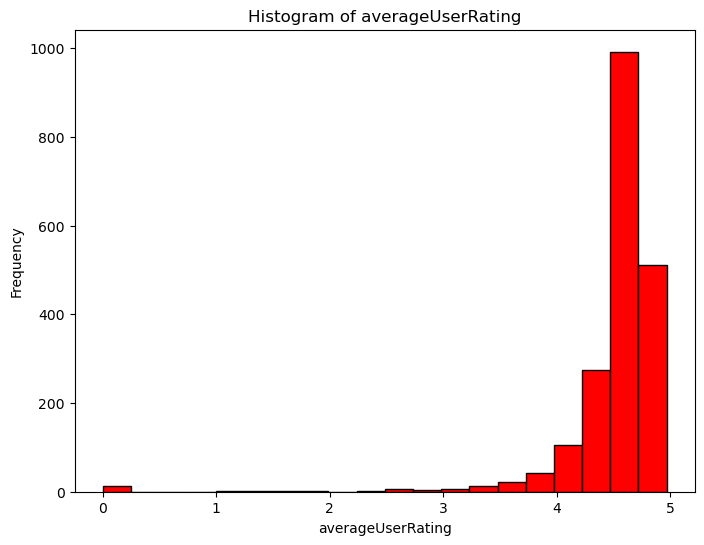

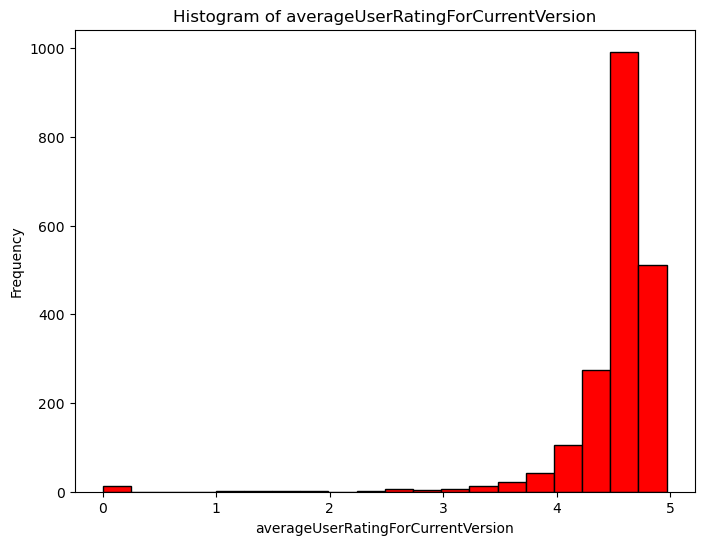

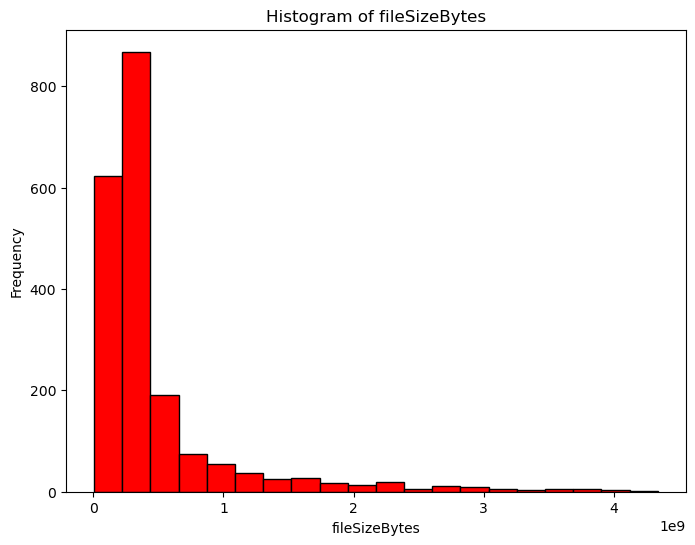

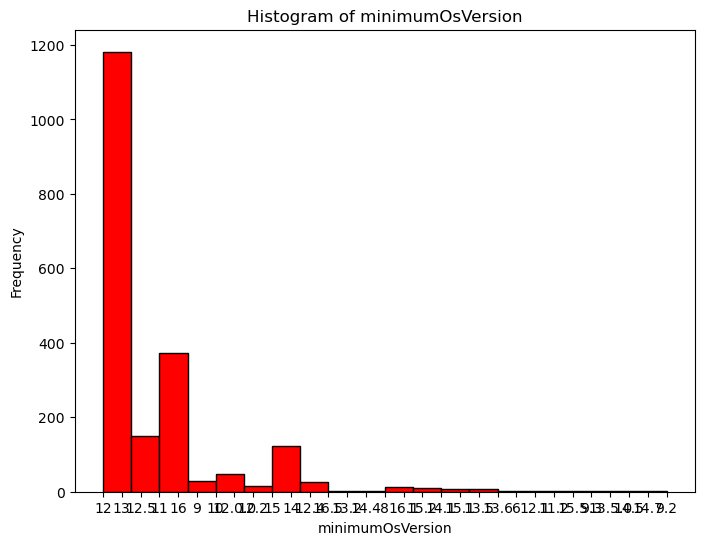

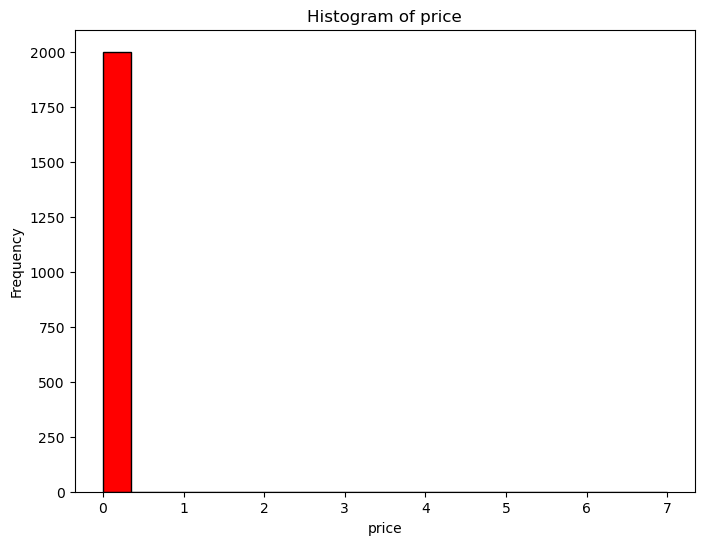

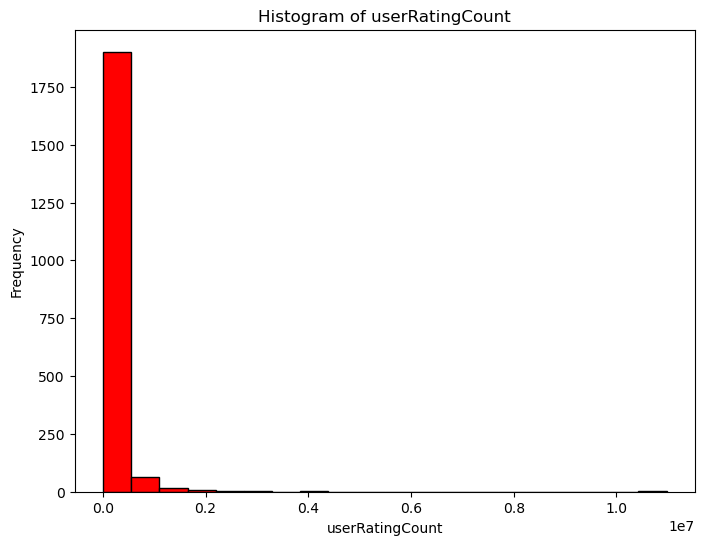

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20070 (\N{CJK UNIFIED IDEOGRAPH-4E66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28059 (\N{CJK UNIFIED IDEOGRAPH-6D9B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21016 (\N{CJK UNIFIED IDEOGRAPH-5218}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25935 (\N{CJK UNIFIED IDEOGRAPH-654F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27901 (\N{CJK UNIFIED IDEOGRAPH-6CFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

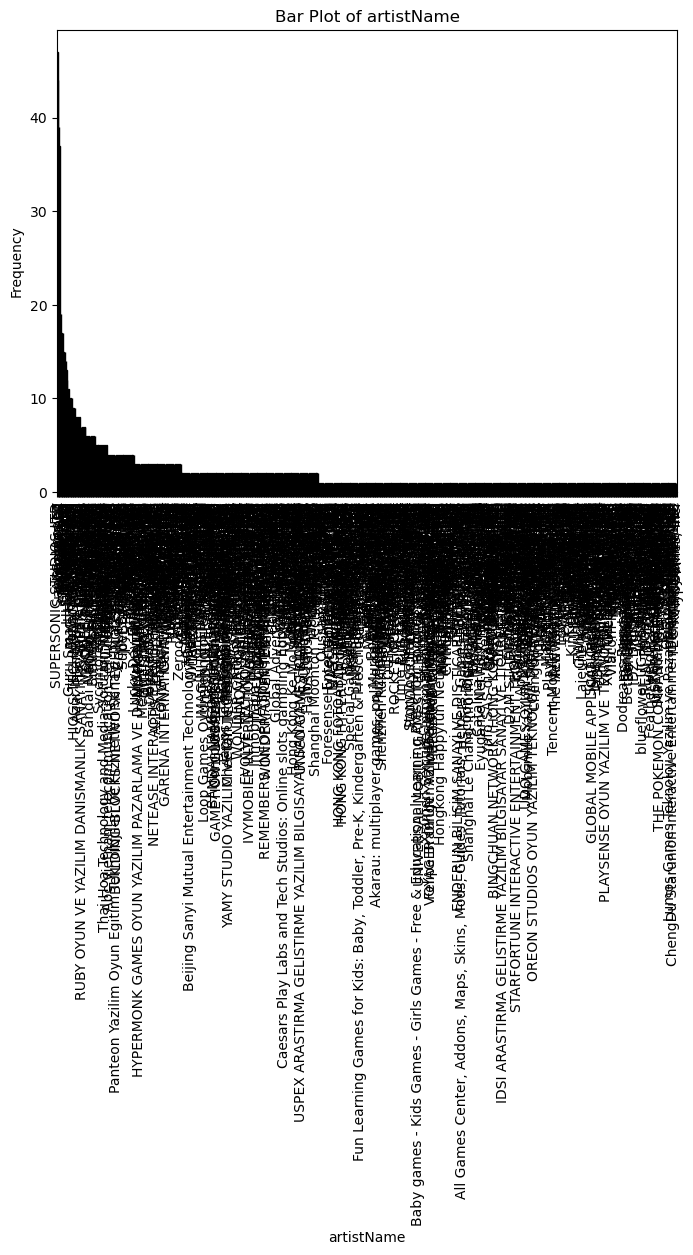

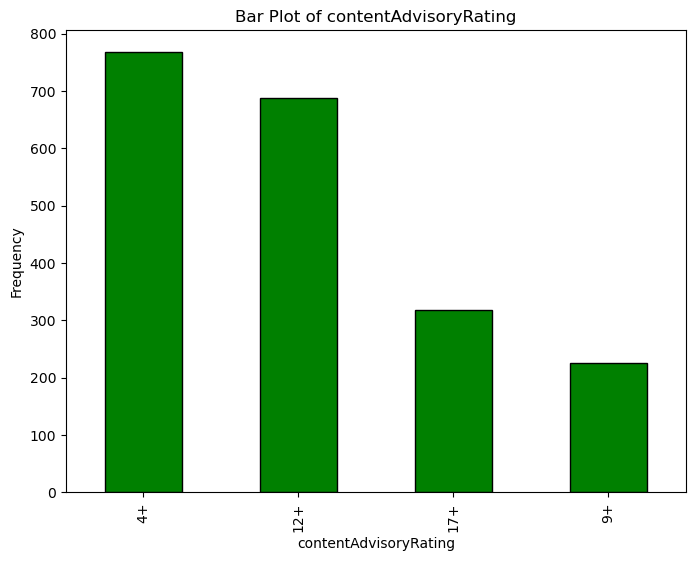

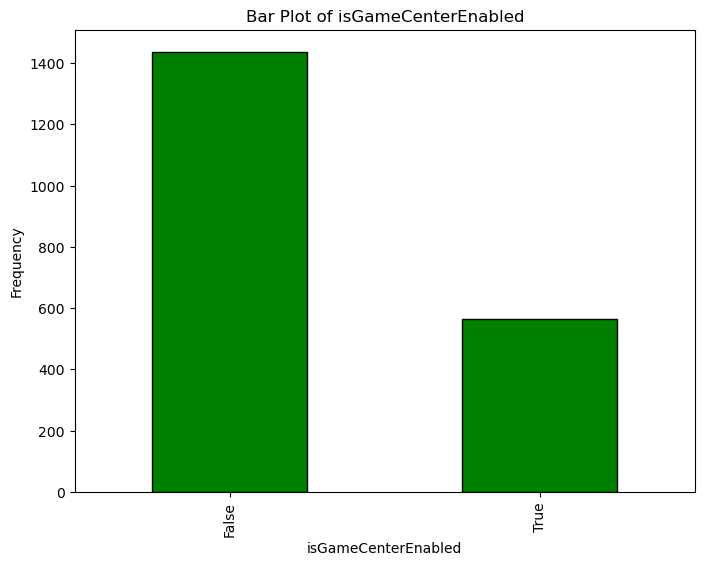

In [10]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(8,6))
    df[column].hist(bins=20, color = 'red', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='green', edgecolor='black')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

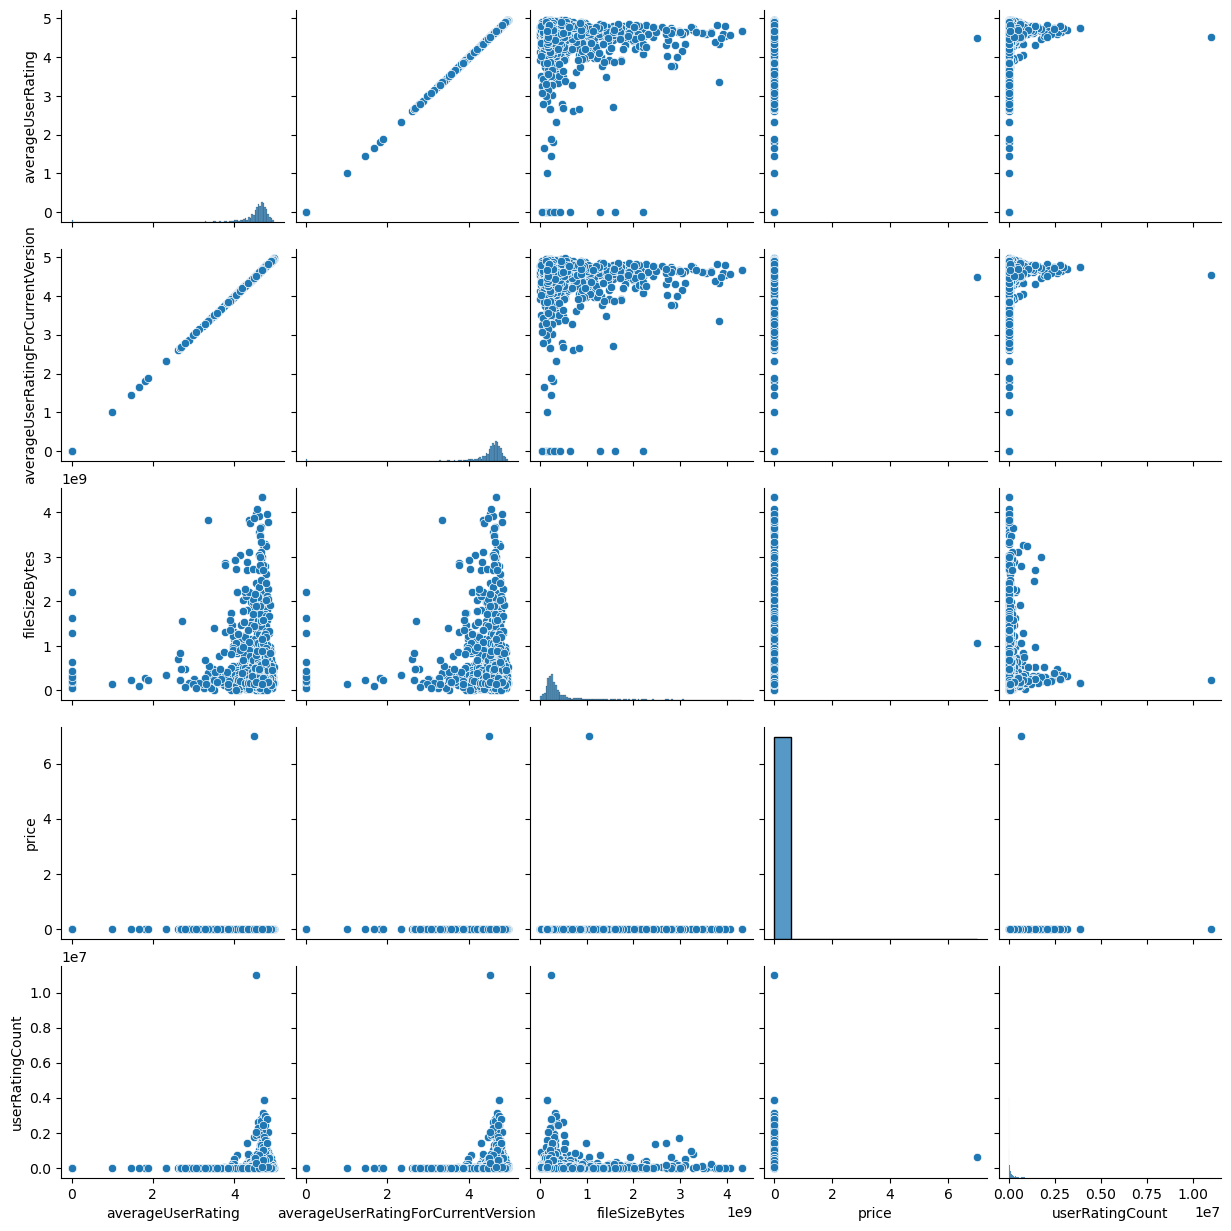

In [11]:
import seaborn as sns

sns.pairplot(df[numerical_columns])
plt.show()

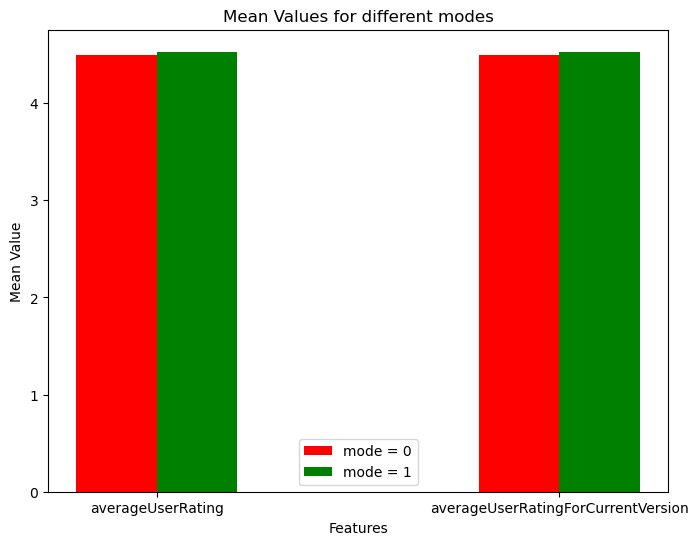

In [25]:
# Assuming 'df' is your DataFrame and you want to create a 'mode' column
# with random zeros and ones for demonstration purposes
import numpy as np

# Generate random zeros and ones for the 'mode' column
df['mode'] = np.random.choice([0, 1], size=len(df))

# Now, you can filter the DataFrame based on the 'mode' column
mean_values_target_0 = df[df['mode'] == 0][['averageUserRating','averageUserRatingForCurrentVersion',]].mean()
mean_values_target_1 = df[df['mode'] == 1][['averageUserRating','averageUserRatingForCurrentVersion',]].mean()

bar_width = 0.2
index = range(len(mean_values_target_0))

plt.figure(figsize=(8, 6))
plt.bar(index, mean_values_target_0, bar_width, label='mode = 0', color='red')
plt.bar([i + bar_width for i in index], mean_values_target_1, bar_width, label='mode = 1', color='green')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values for different modes')
plt.xticks([i + bar_width / 2 for i in index], ['averageUserRating','averageUserRatingForCurrentVersion',])
plt.legend()
plt.show()

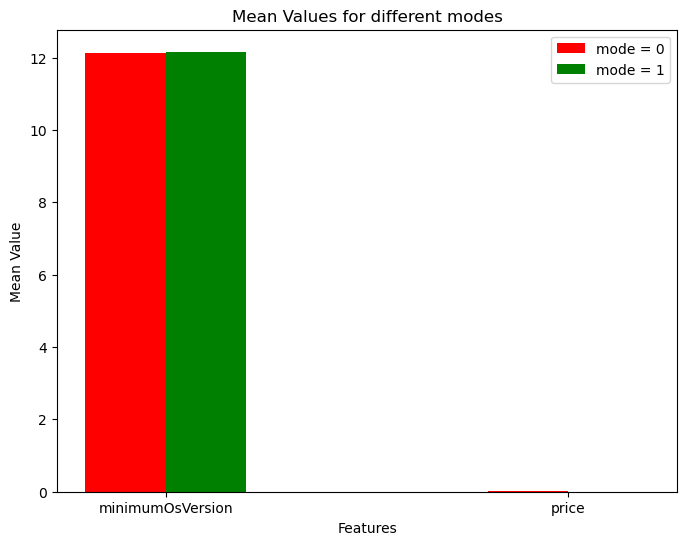

In [27]:
# Assuming 'df' is your DataFrame and you want to create a 'mode' column
# with random zeros and ones for demonstration purposes
import numpy as np

# Generate random zeros and ones for the 'mode' column
df['mode'] = np.random.choice([0, 1], size=len(df))

# Now, you can filter the DataFrame based on the 'mode' column
mean_values_target_0 = df[df['mode'] == 0][['minimumOsVersion','price',]].mean()
mean_values_target_1 = df[df['mode'] == 1][['minimumOsVersion','price',]].mean()
#numerical_columns = ['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']


bar_width = 0.2
index = range(len(mean_values_target_0))

plt.figure(figsize=(8, 6))
plt.bar(index, mean_values_target_0, bar_width, label='mode = 0', color='red')
plt.bar([i + bar_width for i in index], mean_values_target_1, bar_width, label='mode = 1', color='green')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values for different modes')
plt.xticks([i + bar_width / 2 for i in index], ['minimumOsVersion','price',])
plt.legend()
plt.show()

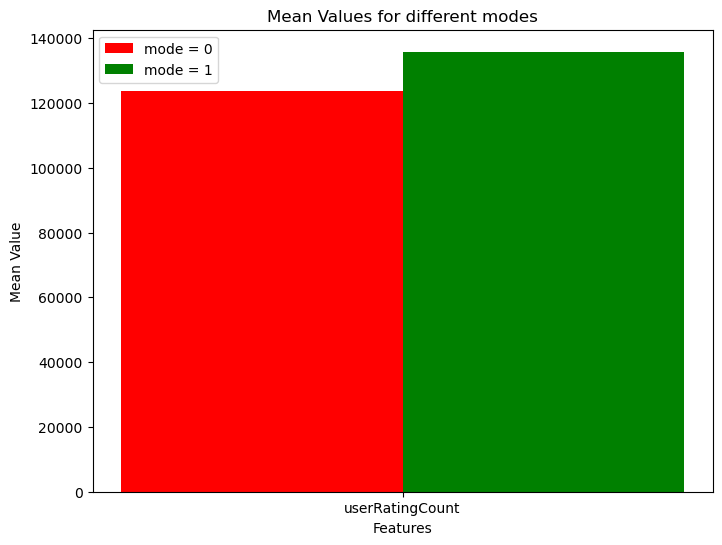

In [29]:
# Assuming 'df' is your DataFrame and you want to create a 'mode' column
# with random zeros and ones for demonstration purposes
import numpy as np

# Generate random zeros and ones for the 'mode' column
df['mode'] = np.random.choice([0, 1], size=len(df))

# Now, you can filter the DataFrame based on the 'mode' column
mean_values_target_0 = df[df['mode'] == 0][['fileSizeBytes']].mean()
mean_values_target_1 = df[df['mode'] == 1][['fileSizeBytes']].mean()
#numerical_columns = ['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']


bar_width = 0.2
index = range(len(mean_values_target_0))

plt.figure(figsize=(8, 6))
plt.bar(index, mean_values_target_0, bar_width, label='mode = 0', color='red')
plt.bar([i + bar_width for i in index], mean_values_target_1, bar_width, label='mode = 1', color='green')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values for different modes')
plt.xticks([i + bar_width / 2 for i in index], ['fileSizeBytes'])
plt.legend()
plt.show()

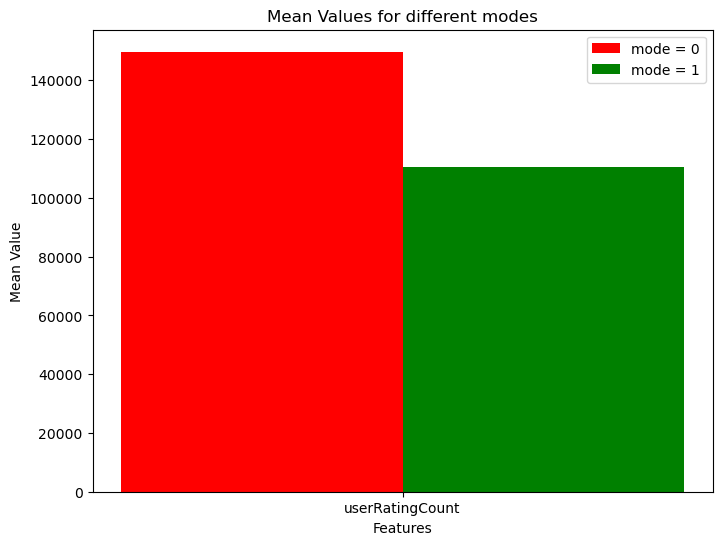

In [30]:
# Assuming 'df' is your DataFrame and you want to create a 'mode' column
# with random zeros and ones for demonstration purposes
import numpy as np

# Generate random zeros and ones for the 'mode' column
df['mode'] = np.random.choice([0, 1], size=len(df))

# Now, you can filter the DataFrame based on the 'mode' column
mean_values_target_0 = df[df['mode'] == 0][['userRatingCount',]].mean()
mean_values_target_1 = df[df['mode'] == 1][['userRatingCount',]].mean()
#numerical_columns = ['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']


bar_width = 0.2
index = range(len(mean_values_target_0))

plt.figure(figsize=(8, 6))
plt.bar(index, mean_values_target_0, bar_width, label='mode = 0', color='red')
plt.bar([i + bar_width for i in index], mean_values_target_1, bar_width, label='mode = 1', color='green')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values for different modes')
plt.xticks([i + bar_width / 2 for i in index], ['userRatingCount',])
plt.legend()
plt.show()

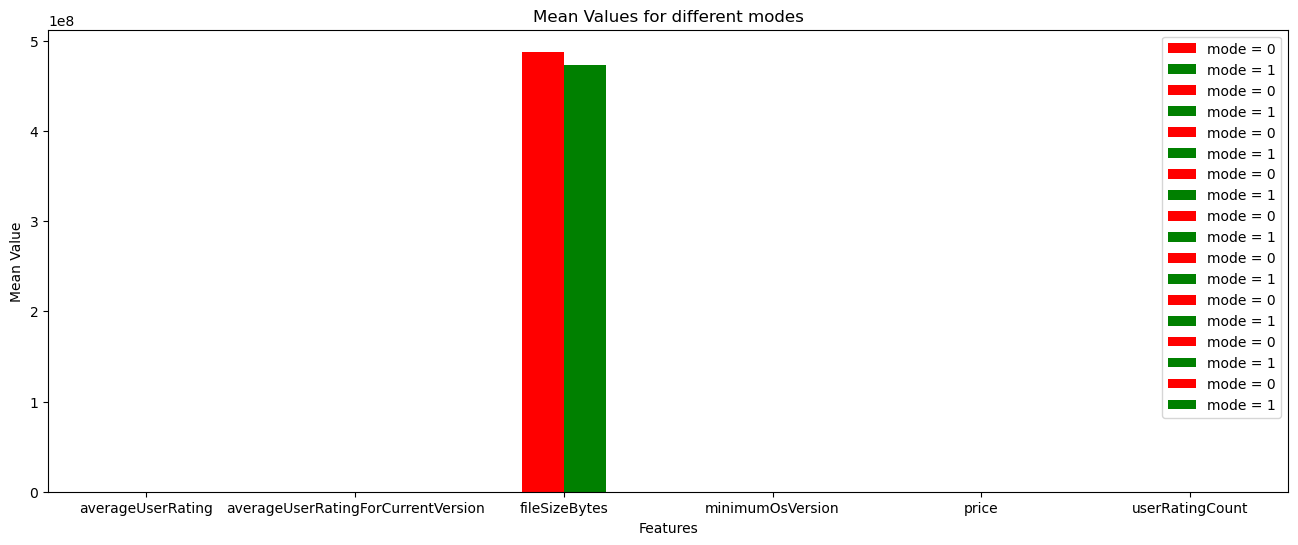

In [32]:
# Generate random zeros and ones for the 'mode' column
df['mode'] = np.random.choice([0, 1], size=len(df))

# Now, you can filter the DataFrame based on the 'mode' column
mean_values_mode_0 = df[df['mode'] == 0][['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']].mean()
mean_values_mode_1 = df[df['mode'] == 1][['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']].mean()
#numerical_columns = ['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount']


bar_width = 0.2
index = range(len(mean_values_target_0))

plt.figure(figsize=(16, 6))

for i in range (0, 9):
    plt.bar(index, mean_values_mode_0, bar_width, label='mode = 0', color='red')
    plt.bar([i + bar_width for i in index], mean_values_mode_1, bar_width, label='mode = 1', color='green')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values for different modes')
plt.xticks([i + bar_width / 2 for i in index], ['averageUserRating','averageUserRatingForCurrentVersion','fileSizeBytes','minimumOsVersion','price','userRatingCount'])
plt.legend()
plt.show()


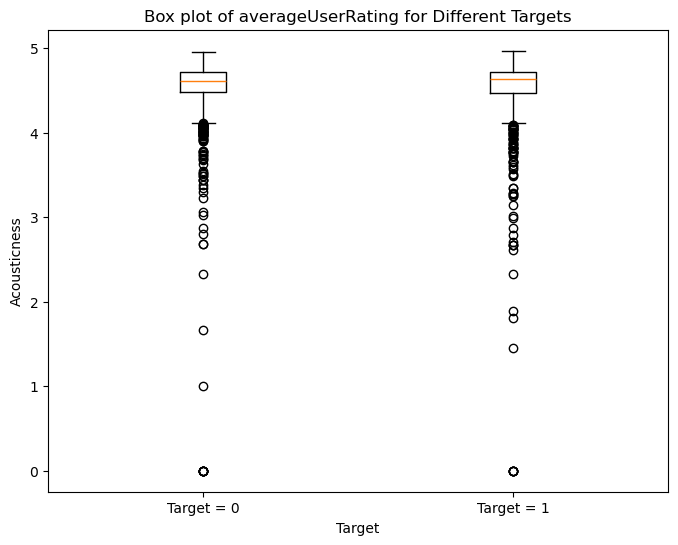

In [35]:
df['target'] = np.random.choice([0, 1], size=len(df))

averageUserRating_target_0 = df[df['target'] == 0]['averageUserRating']
averageUserRating_target_1 = df[df['target'] == 1]['averageUserRating']

plt.figure(figsize=(8, 6))
plt.boxplot([averageUserRating_target_0, averageUserRating_target_1], labels=['Target = 0', 'Target = 1'])
plt.xlabel('Target')
plt.ylabel('Acousticness')
plt.title('Box plot of averageUserRating for Different Targets')
plt.show()


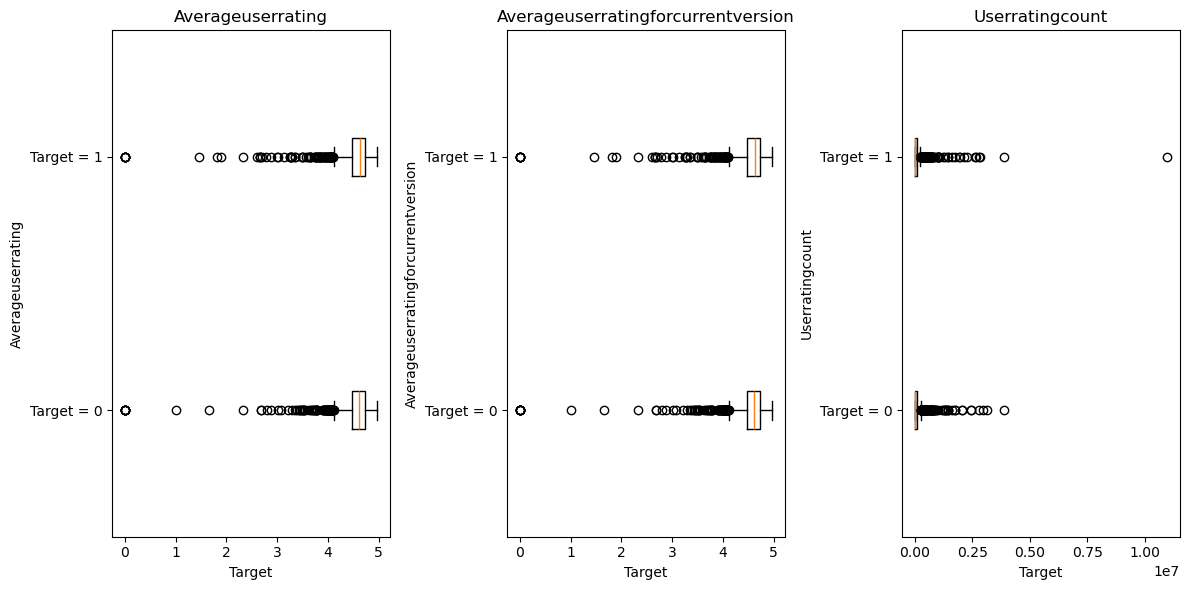

In [37]:
features = ['averageUserRating', 'averageUserRatingForCurrentVersion', 'userRatingCount']
targets = [0, 1]

plt.figure(figsize=(12, 6))

for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    data = [df[df['target'] == target][feature] for target in targets]
    plt.boxplot(data, labels=['Target = 0', 'Target = 1'], showmeans=False, vert=False)
    plt.xlabel('Target')
    plt.ylabel(feature.capitalize())
    plt.title(feature.capitalize())

plt.tight_layout()
plt.show()


Correlation Matrix:
                                    averageUserRating  \
averageUserRating                            1.000000   
averageUserRatingForCurrentVersion           1.000000   
fileSizeBytes                               -0.025800   
minimumOsVersion                            -0.028473   
price                                       -0.000690   
userRatingCount                              0.088974   

                                    averageUserRatingForCurrentVersion  \
averageUserRating                                             1.000000   
averageUserRatingForCurrentVersion                            1.000000   
fileSizeBytes                                                -0.025800   
minimumOsVersion                                             -0.028473   
price                                                        -0.000690   
userRatingCount                                               0.088974   

                                    fileSizeBytes  minimumOsV

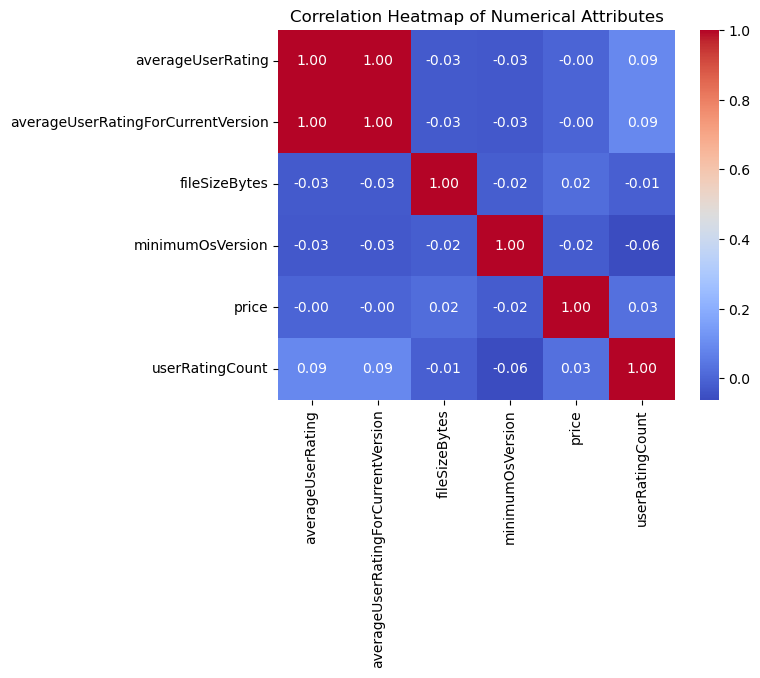

In [38]:
# 8.1

correlation_matrix = df[numerical_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

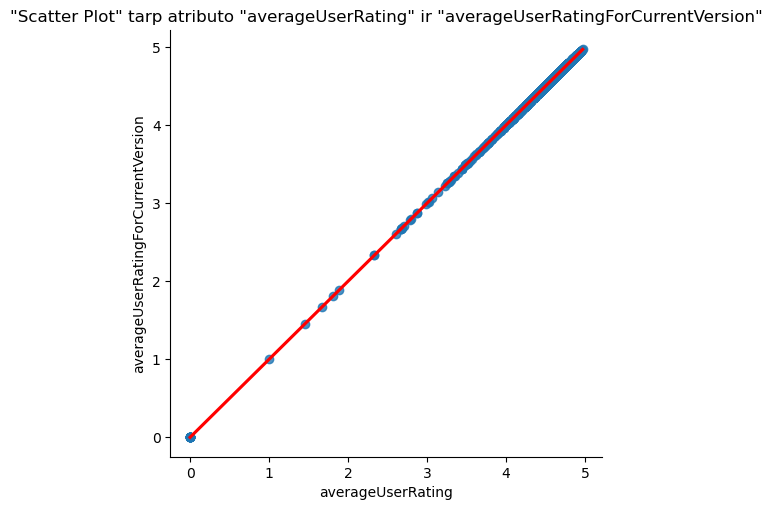

In [40]:
sns.lmplot(data=df, x='averageUserRating', y='averageUserRatingForCurrentVersion', line_kws={'color': 'red'})
plt.title('"Scatter Plot" tarp atributo "averageUserRating" ir "averageUserRatingForCurrentVersion"')
plt.xlabel('averageUserRating')
plt.ylabel('averageUserRatingForCurrentVersion')
plt.show()

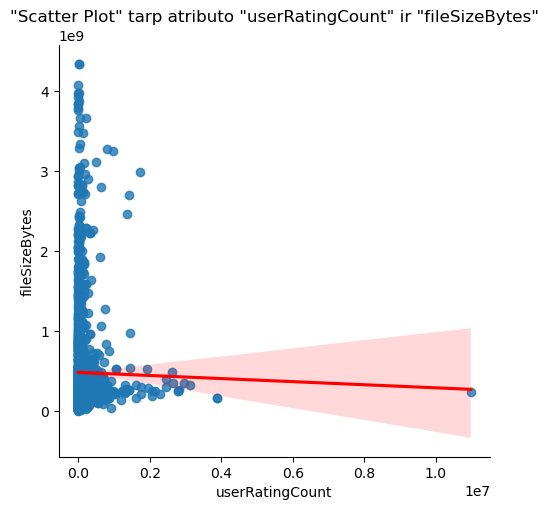

In [41]:
sns.lmplot(data=df, x='userRatingCount', y='fileSizeBytes', line_kws={'color': 'red'})
plt.title('"Scatter Plot" tarp atributo "userRatingCount" ir "fileSizeBytes"')
plt.xlabel('userRatingCount')
plt.ylabel('fileSizeBytes')
plt.show()

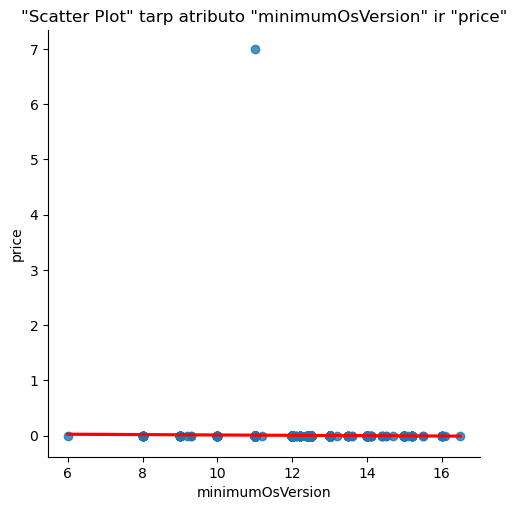

In [42]:
sns.lmplot(data=df, x='minimumOsVersion', y='price', line_kws={'color': 'red'})
plt.title('"Scatter Plot" tarp atributo "minimumOsVersion" ir "price"')
plt.xlabel('minimumOsVersion')
plt.ylabel('price')
plt.show()

                                    averageUserRating  \
averageUserRating                        2.628149e-01   
averageUserRatingForCurrentVersion       2.628149e-01   
fileSizeBytes                           -7.859103e+06   
minimumOsVersion                        -1.650848e-02   
price                                   -5.527181e-05   
userRatingCount                          1.807574e+04   

                                    averageUserRatingForCurrentVersion  \
averageUserRating                                         2.628149e-01   
averageUserRatingForCurrentVersion                        2.628149e-01   
fileSizeBytes                                            -7.859103e+06   
minimumOsVersion                                         -1.650848e-02   
price                                                    -5.527181e-05   
userRatingCount                                           1.807574e+04   

                                    fileSizeBytes  minimumOsVersion  \
averageUse

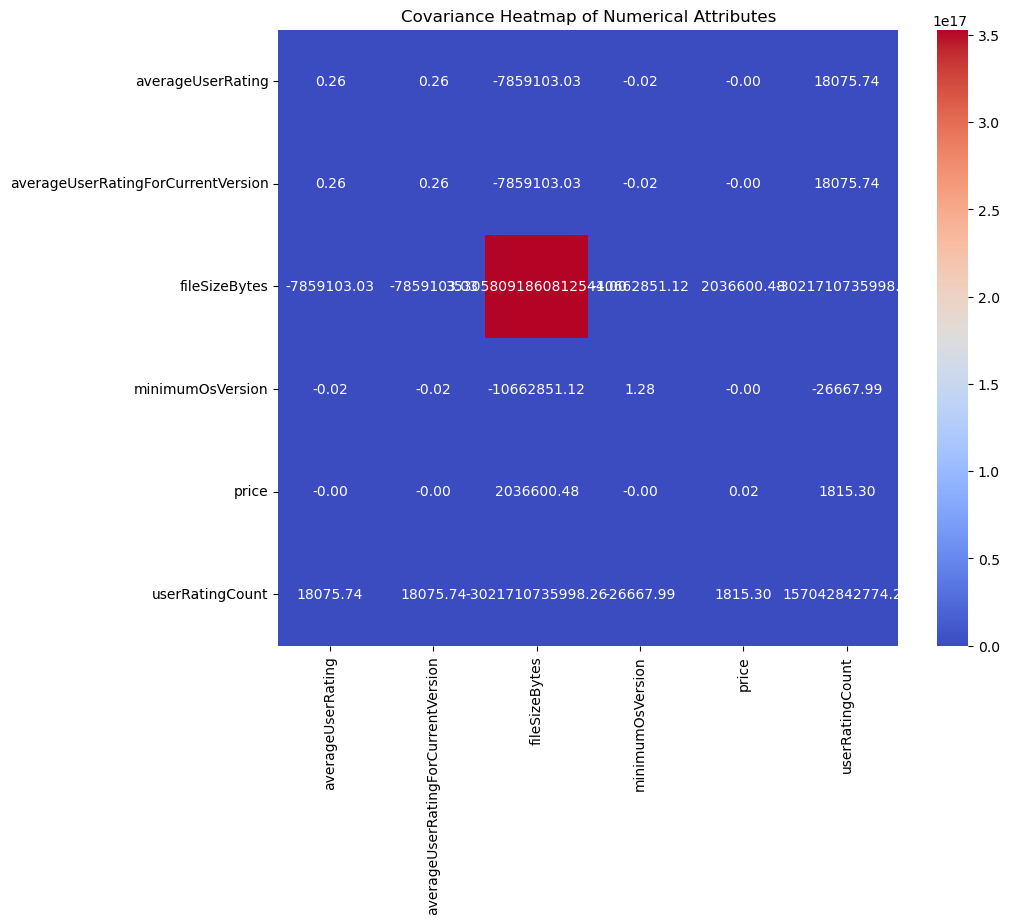

In [43]:
covariance_matrix = df[numerical_columns].cov()

print(covariance_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Heatmap of Numerical Attributes')
plt.show()

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('2000_games_appstore.csv')

# Select numeric columns for normalization
numeric_columns = df.select_dtypes(include=['number'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization
normalized_data = scaler.fit_transform(numeric_columns)

# Convert the normalized array back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns)

# Write the normalized data to a new CSV file
normalized_df.to_csv('normalized_data.csv', index=False)

print("Normalized data has been written to 'normalized_data.csv'.")

Normalized data has been written to 'normalized_data.csv'.


/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
